In [16]:
import torch
from models_and_data.nn import NeuralNetwork
from sklearn.decomposition import PCA

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [45]:
def plot_single_model_features(weights, title, grid_size=(4, 4), figure_size=(6, 6)):
    """
    Generates a visual of the features for a single model.

    Args:
        weights (np.ndarray): The weight matrix of the model. Shape: (input_dim, hidden_dim).
        title (str): The title for the plot.
        grid_size (tuple): The (rows, cols) of the subplot grid.
        figure_size (tuple): The (width, height) of the matplotlib figure.
    """
    hidden_dim = weights.shape[1]
    
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=figure_size)
    fig.suptitle(title, fontsize=16)
    
    for i, ax in enumerate(axes.flat):
        if i < hidden_dim:
            # Get, reshape, and display the feature
            feature = weights[:, i].reshape(28, 28)
            # feature = weights[:, i].reshape(4, 4)

            ax.imshow(feature, cmap='gray')
            # ax.imshow(feature)
        ax.set_axis_off()
        
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [46]:
def plot_pca_of_features(weights, title, n_components, grid_size=(4, 4), figure_size=(6, 6)):
    """
    Performs PCA on the feature weights and visualizes the principal components.
    These components often represent cleaner, more holistic patterns.

    Args:
        weights (np.ndarray): The weight matrix. Shape: (input_dim, hidden_dim).
        title (str): The title for the plot.
        n_components (int): The number of principal components to find and display.
        grid_size (tuple): The (rows, cols) of the subplot grid.
        figure_size (tuple): The (width, height) of the matplotlib figure.
    """
    # We perform PCA on the features (columns), so we transpose the weights matrix
    # to have shape (n_features, n_dimensions_per_feature)
    weights_transposed = weights.T  # Shape: (hidden_dim, input_dim)

    # Initialize and fit PCA
    pca = PCA(n_components=n_components)
    pca.fit(weights_transposed)
    
    # The components are the directions of maximum variance in the feature space
    principal_components = pca.components_ # Shape: (n_components, input_dim)

    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=figure_size)
    fig.suptitle(title, fontsize=16)

    for i, ax in enumerate(axes.flat):
        if i < n_components:
            # Reshape each component into a 28x28 image and display
            component_image = principal_components[i].reshape(28, 28)
            ax.imshow(component_image, cmap='gray')
            # ax.imshow(component_image)

            
            # Show the explained variance for each component
            explained_variance = pca.explained_variance_ratio_[i] * 100
            ax.set_title(f"PC {i+1}\n({explained_variance:.1f}%)", fontsize=8)
        ax.set_axis_off()
        
    plt.tight_layout(rect=[0, 0.03, 1, 0.93])
    plt.show()

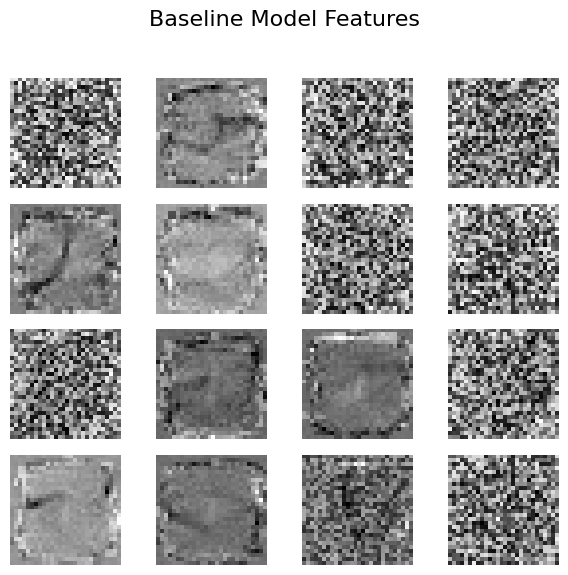

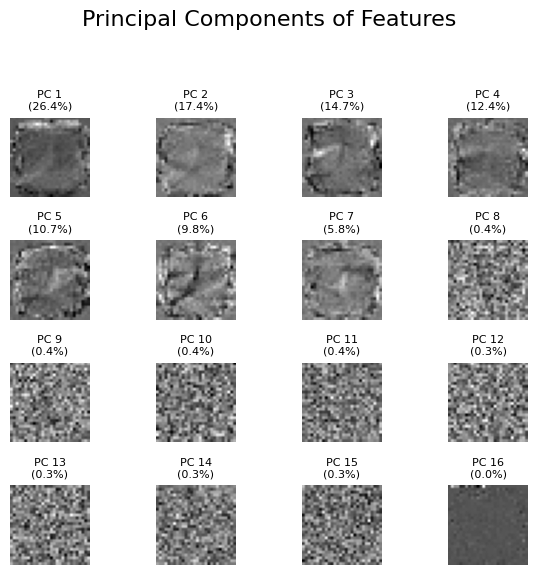

In [49]:
model = NeuralNetwork().to(device)
best_model_path = "./SAE-Results/256-0.75/results/baseline/model_state_dict.pth"

checkpoint = torch.load(best_model_path)
model.load_state_dict(checkpoint['model_state_dict'])

# Define model dimensions
input_dim = 784  # 28*28 pixels
hidden_dim = 16  # 8x8 grid
grid_size = (4, 4)

weights_tensor = model.hidden_one.weight
baseline_weights_np = weights_tensor.cpu().detach().numpy().T

plot_single_model_features(
    baseline_weights_np, 
    title="Baseline Model Features", 
    grid_size=grid_size
)

plot_pca_of_features(
    baseline_weights_np,
    title="Principal Components of Features",
    n_components=hidden_dim, # Visualize all 16 components
    grid_size=grid_size
)

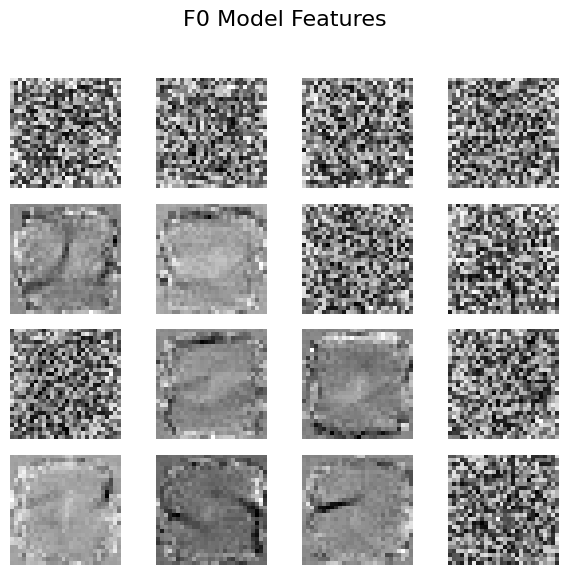

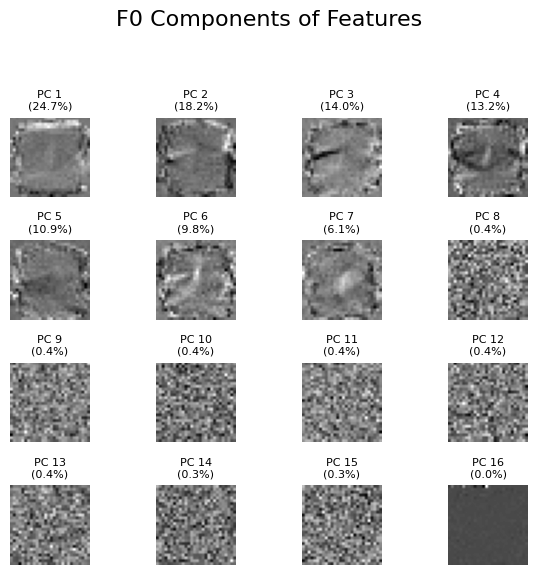

In [33]:
model = NeuralNetwork().to(device)
best_model_path = "./SAE-Results/256-0.75/results/F0/models/25_top/best_model_lf_0.14.pth"
checkpoint = torch.load(best_model_path)
model.load_state_dict(checkpoint['model_state_dict'])

# Define model dimensions
input_dim = 784  # 28*28 pixels
hidden_dim = 16  # 8x8 grid
grid_size = (4, 4)

weights_tensor = model.hidden_one.weight
baseline_weights_np_f0 = weights_tensor.cpu().detach().numpy().T

plot_single_model_features(
    baseline_weights_np_f0, 
    title="F0 Model Features", 
    grid_size=grid_size
)

plot_pca_of_features(
    baseline_weights_np_f0,
    title="F0 Components of Features",
    n_components=hidden_dim, # Visualize all 16 components
    grid_size=grid_size
)

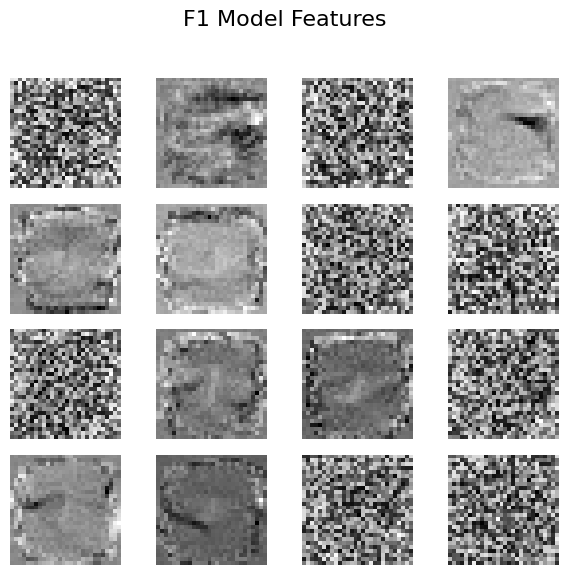

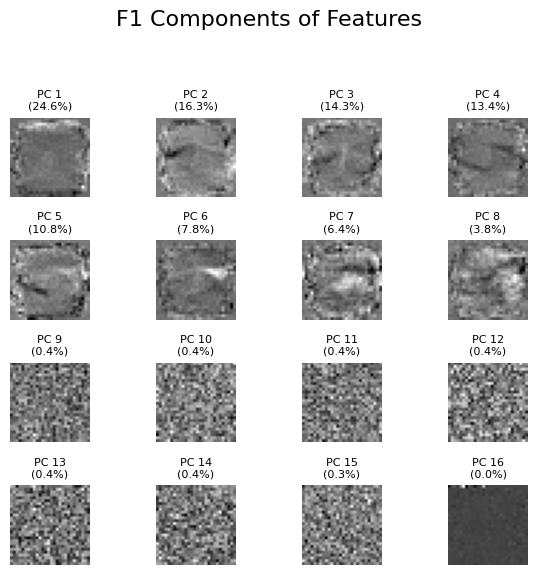

In [34]:
model = NeuralNetwork().to(device)
best_model_path = "./SAE-Results/256-0.75/results/F1/models/25_top_0.14/25_top/best_model_lf_0.06.pth"
checkpoint = torch.load(best_model_path)
model.load_state_dict(checkpoint['model_state_dict'])

# Define model dimensions
input_dim = 784  # 28*28 pixels
hidden_dim = 16  # 8x8 grid
grid_size = (4, 4)

weights_tensor = model.hidden_one.weight
baseline_weights_np_f1 = weights_tensor.cpu().detach().numpy().T

plot_single_model_features(
    baseline_weights_np_f1, 
    title="F1 Model Features", 
    grid_size=grid_size
)

plot_pca_of_features(
    baseline_weights_np_f1,
    title="F1 Components of Features",
    n_components=hidden_dim, # Visualize all 16 components
    grid_size=grid_size
)

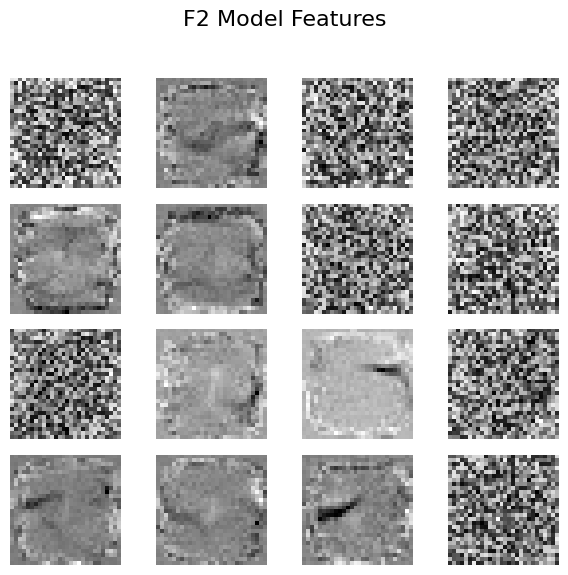

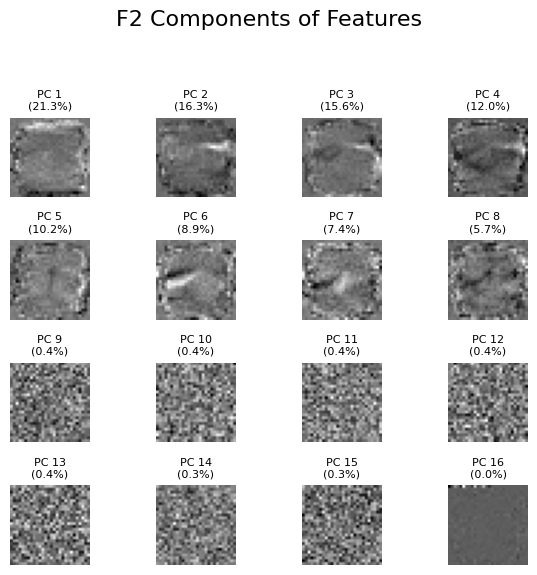

In [35]:
model = NeuralNetwork().to(device)
best_model_path = "./SAE-Results/256-0.75/results/F2/models/25_top_0.14_25_top_0.06/25_top/best_model_lf_0.18.pth"
checkpoint = torch.load(best_model_path)
model.load_state_dict(checkpoint['model_state_dict'])

# Define model dimensions
input_dim = 784  # 28*28 pixels
hidden_dim = 16  # 8x8 grid
grid_size = (4, 4)

weights_tensor = model.hidden_one.weight
baseline_weights_np_f2 = weights_tensor.cpu().detach().numpy().T

plot_single_model_features(
    baseline_weights_np_f2, 
    title="F2 Model Features", 
    grid_size=grid_size
)

plot_pca_of_features(
    baseline_weights_np_f2,
    title="F2 Components of Features",
    n_components=hidden_dim, # Visualize all 16 components
    grid_size=grid_size
)